<a href="https://colab.research.google.com/github/khatu2/Consumer-Spending-Regression-Analysis/blob/main/InflationAndConsumerSpending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data obtained from FRED (https://fred.stlouisfed.org/)

In [5]:
import pandas as pd
import numpy as np

In [6]:
import os


file_path = os.getenv("file_path")  # Fetch from environment variable
Inflationdf = pd.read_excel(file_path, sheet_name='Daily')
print(Inflationdf.head())

  observation_date  T5YIE
0       2024-01-02   2.17
1       2024-01-03   2.17
2       2024-01-04   2.18
3       2024-01-05   2.19
4       2024-01-08   2.19


In [7]:
Inflationdf['month'] = Inflationdf['observation_date'].dt.month
print(Inflationdf.head())

  observation_date  T5YIE  month
0       2024-01-02   2.17      1
1       2024-01-03   2.17      1
2       2024-01-04   2.18      1
3       2024-01-05   2.19      1
4       2024-01-08   2.19      1


In [8]:
InflationdfMonthly = Inflationdf.groupby('month')['T5YIE'].mean().reset_index()
print(InflationdfMonthly)

    month     T5YIE
0       1  2.224762
1       2  2.317000
2       3  2.381000
3       4  2.451364
4       5  2.333182
5       6  2.214211
6       7  2.184545
7       8  1.973182
8       9  1.967000
9      10  2.231364
10     11  2.387895
11     12  2.363810


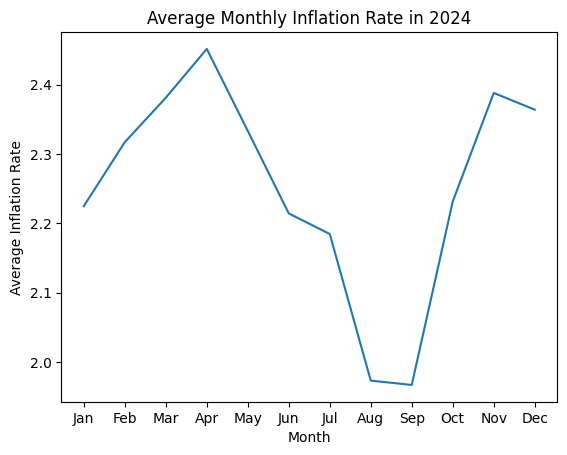

In [9]:
import matplotlib.pyplot as plt
import calendar

plt.plot(InflationdfMonthly['month'], InflationdfMonthly['T5YIE'])
plt.xlabel('Month')
plt.ylabel('Average Inflation Rate')
plt.title('Average Monthly Inflation Rate in 2024')

month_names = [calendar.month_abbr[i] for i in range(1, 13)]

plt.xticks(range(1, 13), month_names)

plt.show()

In [10]:
file_path2 = os.getenv("file_path2")
ConsumerSpendingdf = pd.read_excel(file_path2, sheet_name='Monthly')
print(ConsumerSpendingdf)

   observation_date      PCE
0        2024-01-01  19308.5
1        2024-02-01  19412.7
2        2024-03-01  19553.2
3        2024-04-01  19603.3
4        2024-05-01  19697.3
5        2024-06-01  19747.5
6        2024-07-01  19866.3
7        2024-08-01  19905.0
8        2024-09-01  20044.1
9        2024-10-01  20134.5
10       2024-11-01  20253.6
11       2024-12-01  20387.2


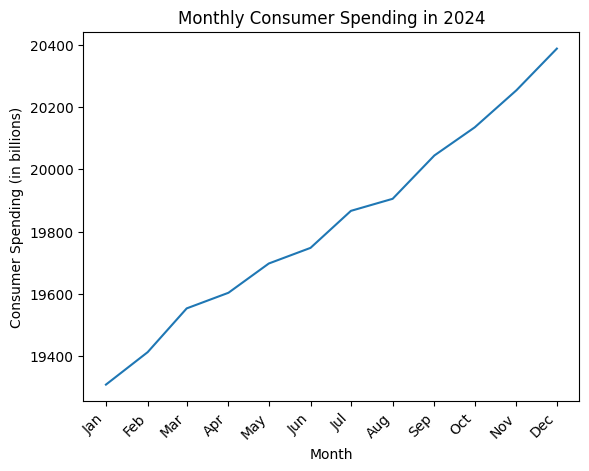

In [11]:
import matplotlib.dates as mdates
plt.plot(ConsumerSpendingdf['observation_date'], ConsumerSpendingdf['PCE'])
plt.xlabel('Month')
plt.ylabel('Consumer Spending (in billions)')
plt.title('Monthly Consumer Spending in 2024')
all_month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.gca().set_xticks(ConsumerSpendingdf['observation_date'].unique())
plt.gca().set_xticklabels(all_month_names, rotation=45, ha='right')
plt.show()

In [12]:
file_path3 = os.getenv("file_path3")
InterestRatedf = pd.read_excel(file_path3, sheet_name='Interest')
print(InterestRatedf.head())

  observation_date   DFF
0       2024-01-01  5.33
1       2024-01-02  5.33
2       2024-01-03  5.33
3       2024-01-04  5.33
4       2024-01-05  5.33


In [13]:
InterestRatedf['month'] = InterestRatedf['observation_date'].dt.month
print(InterestRatedf.head())

  observation_date   DFF  month
0       2024-01-01  5.33      1
1       2024-01-02  5.33      1
2       2024-01-03  5.33      1
3       2024-01-04  5.33      1
4       2024-01-05  5.33      1


In [14]:
InterestRatedfMonthly = InterestRatedf.groupby('month')['DFF'].mean().reset_index()
print(InterestRatedfMonthly)

    month       DFF
0       1  5.330000
1       2  5.330000
2       3  5.330000
3       4  5.330000
4       5  5.330000
5       6  5.330000
6       7  5.330000
7       8  5.330000
8       9  5.130000
9      10  4.830000
10     11  4.638333
11     12  4.475161


In [15]:
ConsumerSpendingdf['month'] = ConsumerSpendingdf['observation_date'].dt.month
print(ConsumerSpendingdf.head())

  observation_date      PCE  month
0       2024-01-01  19308.5      1
1       2024-02-01  19412.7      2
2       2024-03-01  19553.2      3
3       2024-04-01  19603.3      4
4       2024-05-01  19697.3      5


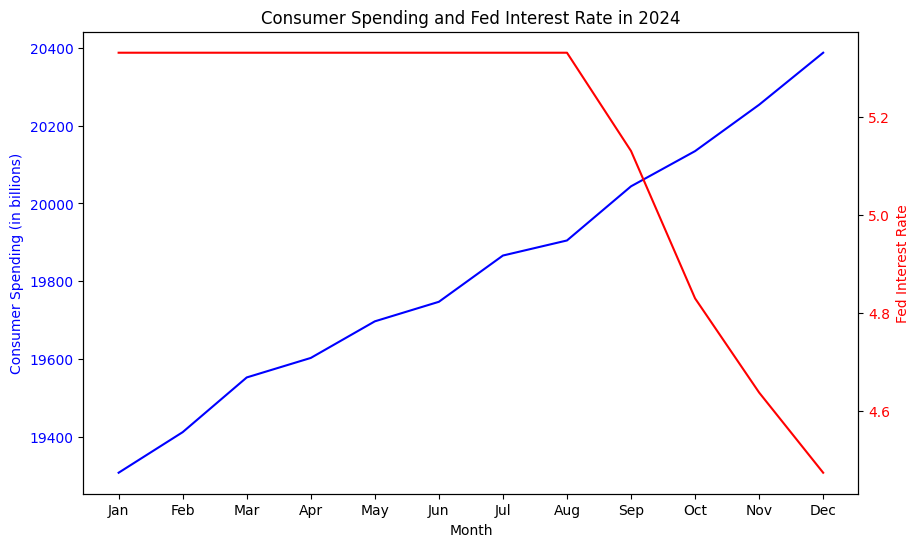

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(ConsumerSpendingdf['month'], ConsumerSpendingdf['PCE'], color='blue', label='Consumer Spending')
ax1.set_xlabel('Month')
ax1.set_ylabel('Consumer Spending (in billions)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(InterestRatedfMonthly['month'], InterestRatedfMonthly['DFF'], color='red', label='Interest Rate')
ax2.set_ylabel('Fed Interest Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

plt.xticks(range(1, 13), month_names)
plt.title('Consumer Spending and Fed Interest Rate in 2024')
plt.show()

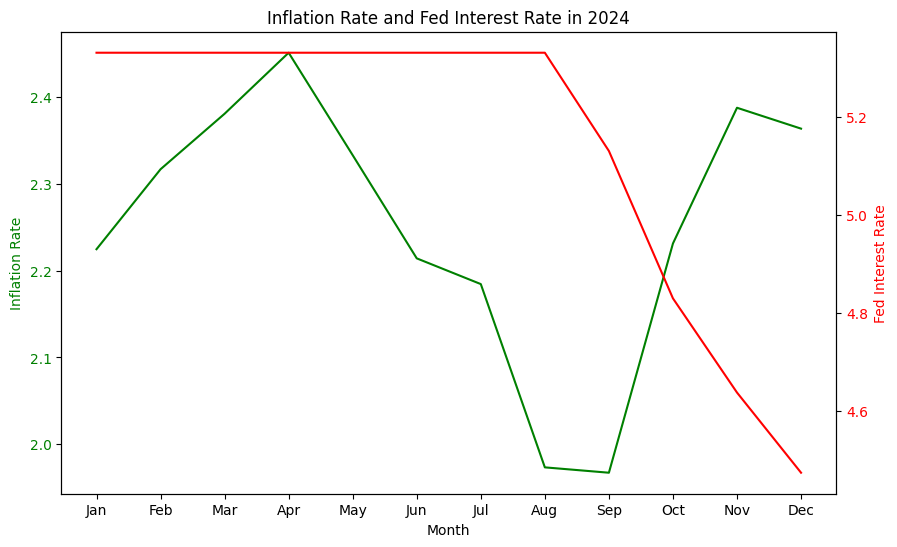

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(InflationdfMonthly['month'], InflationdfMonthly['T5YIE'], color='green', label='Inflation Rate')
ax1.set_xlabel('Month')
ax1.set_ylabel('Inflation Rate', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax2 = ax1.twinx()
ax2.plot(InterestRatedfMonthly['month'], InterestRatedfMonthly['DFF'], color='red', label='Interest Rate')
ax2.set_ylabel('Fed Interest Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

plt.xticks(range(1, 13), month_names)
plt.title('Inflation Rate and Fed Interest Rate in 2024')
plt.show()

In [18]:
file_path4 = os.getenv("file_path4")
Unemploymentdf = pd.read_excel(file_path4, sheet_name='Monthly')
print(Unemploymentdf)

   observation_date  UNRATE
0        2024-01-01     3.7
1        2024-02-01     3.9
2        2024-03-01     3.9
3        2024-04-01     3.9
4        2024-05-01     4.0
5        2024-06-01     4.1
6        2024-07-01     4.2
7        2024-08-01     4.2
8        2024-09-01     4.1
9        2024-10-01     4.1
10       2024-11-01     4.2
11       2024-12-01     4.1


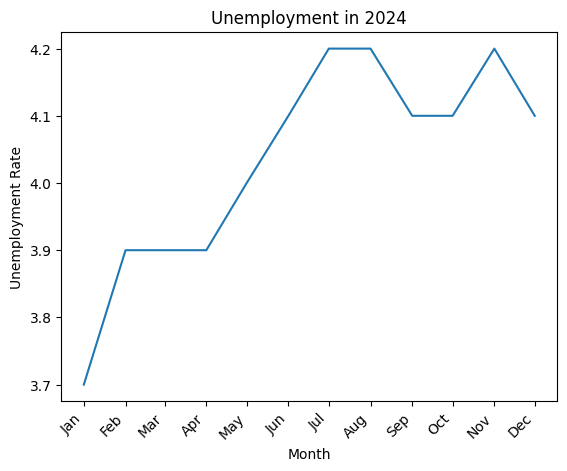

In [19]:
import matplotlib.dates as mdates
plt.plot(Unemploymentdf['observation_date'], Unemploymentdf['UNRATE'])
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment in 2024')
all_month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.gca().set_xticks(Unemploymentdf['observation_date'].unique())
plt.gca().set_xticklabels(all_month_names, rotation=45, ha='right')
plt.show()

In [20]:
# Extract the month from 'observation_date'
#ConsumerSpendingdf['month'] = ConsumerSpendingdf['observation_date'].dt.month
Unemploymentdf['month'] = Unemploymentdf['observation_date'].dt.month


# Merge all DataFrames on 'month'
df = (ConsumerSpendingdf
      .merge(InflationdfMonthly, on='month', how='left')
      .merge(InterestRatedfMonthly, on='month', how='left')
      .merge(Unemploymentdf, on='month', how='left'))

# Display the merged DataFrame
print(df.head())

  observation_date_x      PCE  month     T5YIE   DFF observation_date_y  \
0         2024-01-01  19308.5      1  2.224762  5.33         2024-01-01   
1         2024-02-01  19412.7      2  2.317000  5.33         2024-02-01   
2         2024-03-01  19553.2      3  2.381000  5.33         2024-03-01   
3         2024-04-01  19603.3      4  2.451364  5.33         2024-04-01   
4         2024-05-01  19697.3      5  2.333182  5.33         2024-05-01   

   UNRATE  
0     3.7  
1     3.9  
2     3.9  
3     3.9  
4     4.0  


In [21]:
# Reorder columns to place 'month' first
df = df[['month', 'PCE', 'T5YIE', 'DFF', 'UNRATE']]

# Display the DataFrame
print(df)

    month      PCE     T5YIE       DFF  UNRATE
0       1  19308.5  2.224762  5.330000     3.7
1       2  19412.7  2.317000  5.330000     3.9
2       3  19553.2  2.381000  5.330000     3.9
3       4  19603.3  2.451364  5.330000     3.9
4       5  19697.3  2.333182  5.330000     4.0
5       6  19747.5  2.214211  5.330000     4.1
6       7  19866.3  2.184545  5.330000     4.2
7       8  19905.0  1.973182  5.330000     4.2
8       9  20044.1  1.967000  5.130000     4.1
9      10  20134.5  2.231364  4.830000     4.1
10     11  20253.6  2.387895  4.638333     4.2
11     12  20387.2  2.363810  4.475161     4.1


In [22]:
# Rename columns
df = df.rename(columns={
    'PCE': 'Spending',
    'T5YIE': 'Inflation',
    'DFF': 'FedRate'
})
df

,month,Spending,Inflation,FedRate,UNRATE
0,1,19308.5,2.224762,5.330000,3.7
1,2,19412.7,2.317000,5.330000,3.9
2,3,19553.2,2.381000,5.330000,3.9
3,4,19603.3,2.451364,5.330000,3.9
4,5,19697.3,2.333182,5.330000,4.0
5,6,19747.5,2.214211,5.330000,4.1
6,7,19866.3,2.184545,5.330000,4.2
7,8,19905.0,1.973182,5.330000,4.2
8,9,20044.1,1.967000,5.130000,4.1
9,10,20134.5,2.231364,4.830000,4.1


In [23]:
import statsmodels.api as sm

In [24]:
# Independent variables (X)
X = df[['Inflation', 'FedRate', 'UNRATE']]  # Inflation, Interest Rate, Unemployment

# Dependent variable (Y)
Y = df['Spending']  # Consumer Spending

X = sm.add_constant(X)

In [25]:
model = sm.OLS(Y, X).fit()

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     69.93
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           4.42e-06
Time:                        03:12:08   Log-Likelihood:                -66.447
No. Observations:                  12   AIC:                             140.9
Df Residuals:                       8   BIC:                             142.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.978e+04   1326.294     14.914      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
print(df.corr())

              month  Spending  Inflation   FedRate    UNRATE
month      1.000000  0.995619  -0.196125 -0.810364  0.825882
Spending   0.995619  1.000000  -0.126537 -0.843591  0.795695
Inflation -0.196125 -0.126537   1.000000 -0.227122 -0.363804
FedRate   -0.810364 -0.843591  -0.227122  1.000000 -0.408226
UNRATE     0.825882  0.795695  -0.363804 -0.408226  1.000000


In [28]:
df['Inflation_Lagged'] = df['Inflation'].shift(1)

In [29]:
df.corr()

,month,Spending,Inflation,FedRate,UNRATE,Inflation_Lagged
month,1.000000,0.995619,-0.196125,-0.810364,0.825882,-0.356801
Spending,0.995619,1.000000,-0.126537,-0.843591,0.795695,-0.309453
Inflation,-0.196125,-0.126537,1.000000,-0.227122,-0.363804,0.641417
FedRate,-0.810364,-0.843591,-0.227122,1.000000,-0.408226,0.146097
UNRATE,0.825882,0.795695,-0.363804,-0.408226,1.000000,-0.365222
Inflation_Lagged,-0.356801,-0.309453,0.641417,0.146097,-0.365222,1.000000


In [30]:
Unemploymentdf

,observation_date,UNRATE,month
0,2024-01-01,3.7,1
1,2024-02-01,3.9,2
2,2024-03-01,3.9,3
3,2024-04-01,3.9,4
4,2024-05-01,4.0,5
5,2024-06-01,4.1,6
6,2024-07-01,4.2,7
7,2024-08-01,4.2,8
8,2024-09-01,4.1,9
9,2024-10-01,4.1,10


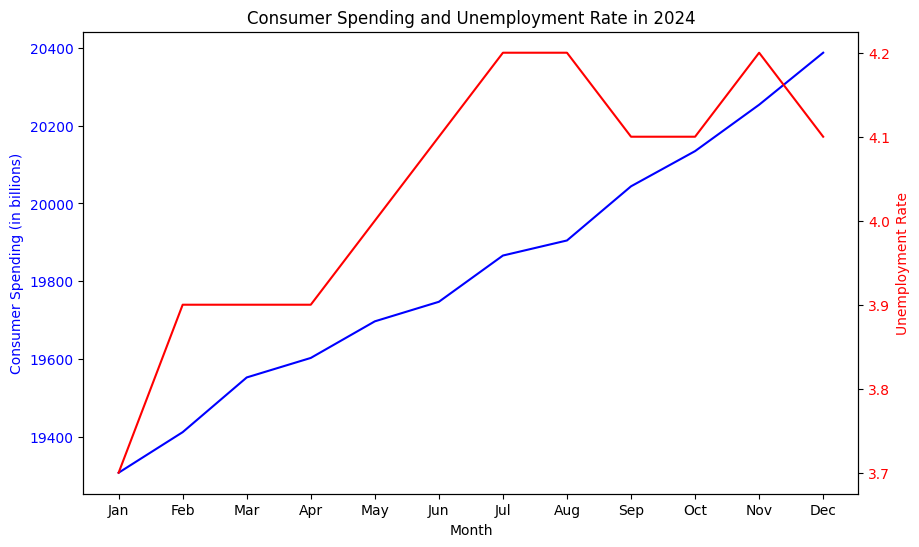

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(ConsumerSpendingdf['month'], ConsumerSpendingdf['PCE'], color='blue', label='Consumer Spending')
ax1.set_xlabel('Month')
ax1.set_ylabel('Consumer Spending (in billions)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(Unemploymentdf['month'], Unemploymentdf['UNRATE'], color='red', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

plt.xticks(range(1, 13), month_names)
plt.title('Consumer Spending and Unemployment Rate in 2024')
plt.show()

In [32]:
df['Inflation_Lagged2'] = df['Inflation'].shift(2)

In [33]:
df.corr()

,month,Spending,Inflation,FedRate,UNRATE,Inflation_Lagged,Inflation_Lagged2
month,1.000000,0.995619,-0.196125,-0.810364,0.825882,-0.356801,-0.617437
Spending,0.995619,1.000000,-0.126537,-0.843591,0.795695,-0.309453,-0.624368
Inflation,-0.196125,-0.126537,1.000000,-0.227122,-0.363804,0.641417,0.002464
FedRate,-0.810364,-0.843591,-0.227122,1.000000,-0.408226,0.146097,0.658584
UNRATE,0.825882,0.795695,-0.363804,-0.408226,1.000000,-0.365222,-0.304511
Inflation_Lagged,-0.356801,-0.309453,0.641417,0.146097,-0.365222,1.000000,0.617752
Inflation_Lagged2,-0.617437,-0.624368,0.002464,0.658584,-0.304511,0.617752,1.000000


In [34]:
df2 = df.dropna(subset=['Inflation_Lagged2'])
X = df2[['Inflation_Lagged2', 'FedRate', 'UNRATE']]
X = sm.add_constant(X)
Y = df2['Spending']
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     47.47
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000142
Time:                        03:12:08   Log-Likelihood:                -53.988
No. Observations:                  10   AIC:                             116.0
Df Residuals:                       6   BIC:                             117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.939e+04   1091.83

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [35]:
X = df[['FedRate', 'UNRATE']]
X = sm.add_constant(X)
model = sm.OLS(df['Spending'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     97.93
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           7.81e-07
Time:                        03:12:08   Log-Likelihood:                -67.521
No. Observations:                  12   AIC:                             141.0
Df Residuals:                       9   BIC:                             142.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+04    920.208     20.160      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
X = df[['FedRate']]
X = sm.add_constant(X)
model = sm.OLS(df['Spending'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     24.68
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           0.000563
Time:                        03:12:09   Log-Likelihood:                -78.810
No. Observations:                  12   AIC:                             161.6
Df Residuals:                      10   BIC:                             162.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.447e+04    935.590     26.150      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [37]:
X = df[['FedRate', 'UNRATE']]
X = sm.add_constant(X)
model = sm.OLS(df['Spending'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     97.93
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           7.81e-07
Time:                        03:12:09   Log-Likelihood:                -67.521
No. Observations:                  12   AIC:                             141.0
Df Residuals:                       9   BIC:                             142.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+04    920.208     20.160      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)
